In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#read the data 
data = pd.read_csv('Cardiotocographic.csv')

In [3]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
data.shape

(2126, 14)

Statistical summary

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [6]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [7]:
#checking for null values
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [8]:
#printing the null columns
null_columns = data.columns[data.isnull().any()]
df_null = data[null_columns]
print("Columns with null values:")
for col in df_null.columns:
    print(col)

Columns with null values:
LB
AC
DS
DP
MLTV
Width
Tendency
NSP


In [9]:
#filling null values 
for value in df_null:
    data[value].fillna(data[value].mean(),inplace=True)

In [10]:
data.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [11]:
data.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

Data Visualization

<Axes: >

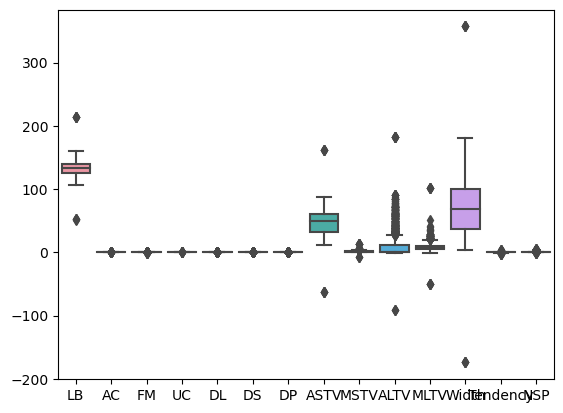

In [23]:
#plotting boxplot for outliers
sns.boxplot(data=data)

In [13]:
#removing the outlier using z_score
def remove_outliers(data, threshold=3):
    mean = data.mean()
    std = data.std()
    
    z_scores = (data - mean) / std
    
    # Filter out data points with Z-score greater than the threshold
    abs_z_scores = np.abs(z_scores)
    filtered_data = data[(abs_z_scores < threshold).all(axis=1)]
    
    return filtered_data

threshold = 3 
data_cleaned = remove_outliers(data, threshold)

# Print the number of entries before and after outlier removal
print("Number of entries before outlier removal:", len(data))
print("Number of entries after outlier removal:", len(data_cleaned))

Number of entries before outlier removal: 2126
Number of entries after outlier removal: 1869


<Axes: >

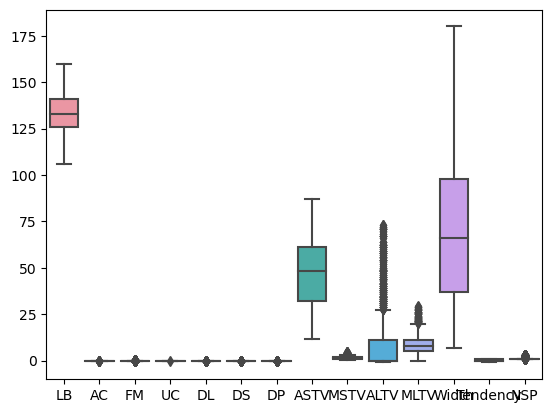

In [19]:
sns.boxplot(data=data_cleaned)

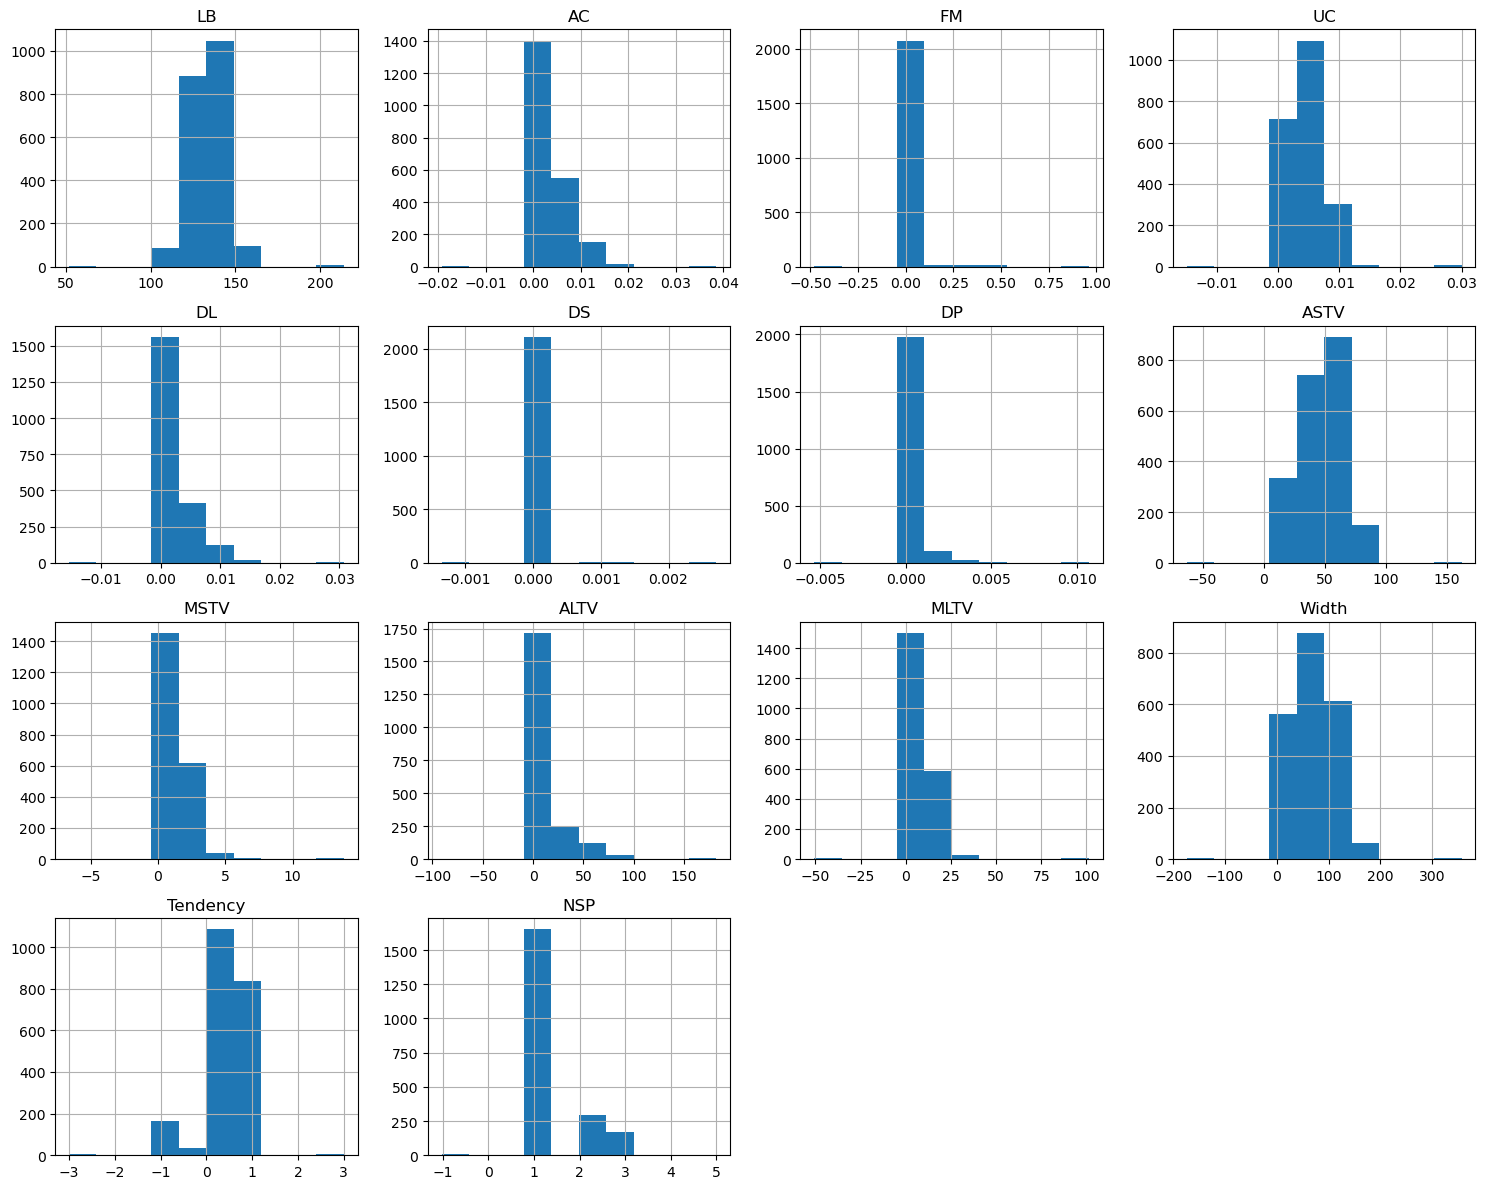

In [52]:
#drawing histogram for each feature
data.hist(bins=10, figsize=(15, 12))
plt.tight_layout()
plt.show()

In [ ]:
#by drawing histogram we understand distribution of data of all features

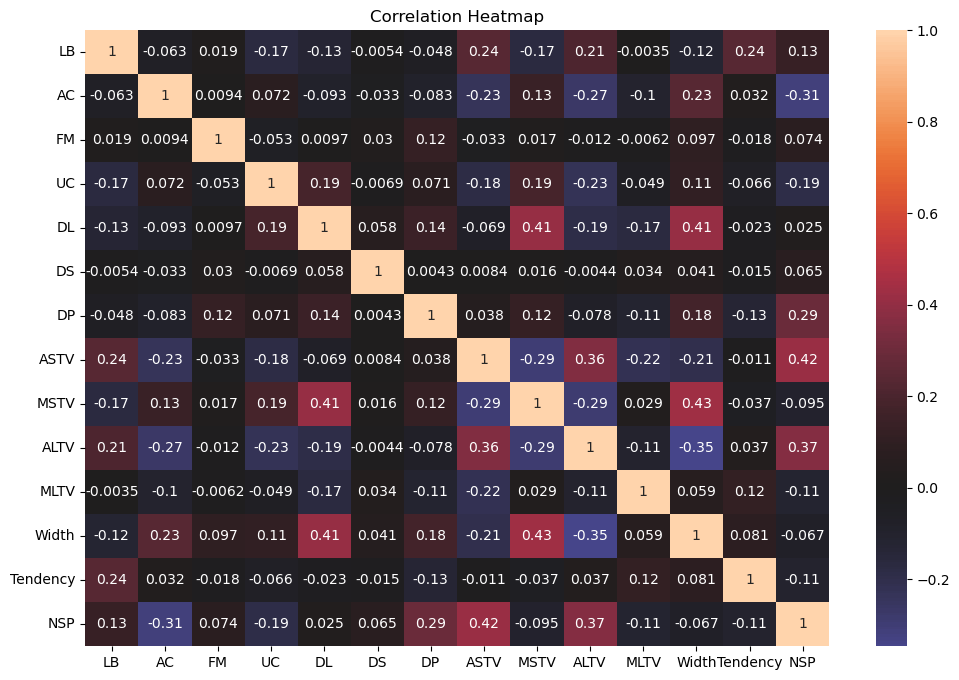

In [39]:
# Generate scatter plots or correlation heatmaps
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#here  NSP and ASTV(0.42), DL and Width(0.41),MSTV and Width(0.43),ALTV and ASTV(0.36),NSP and ALTV(0.37) are +ve correlated

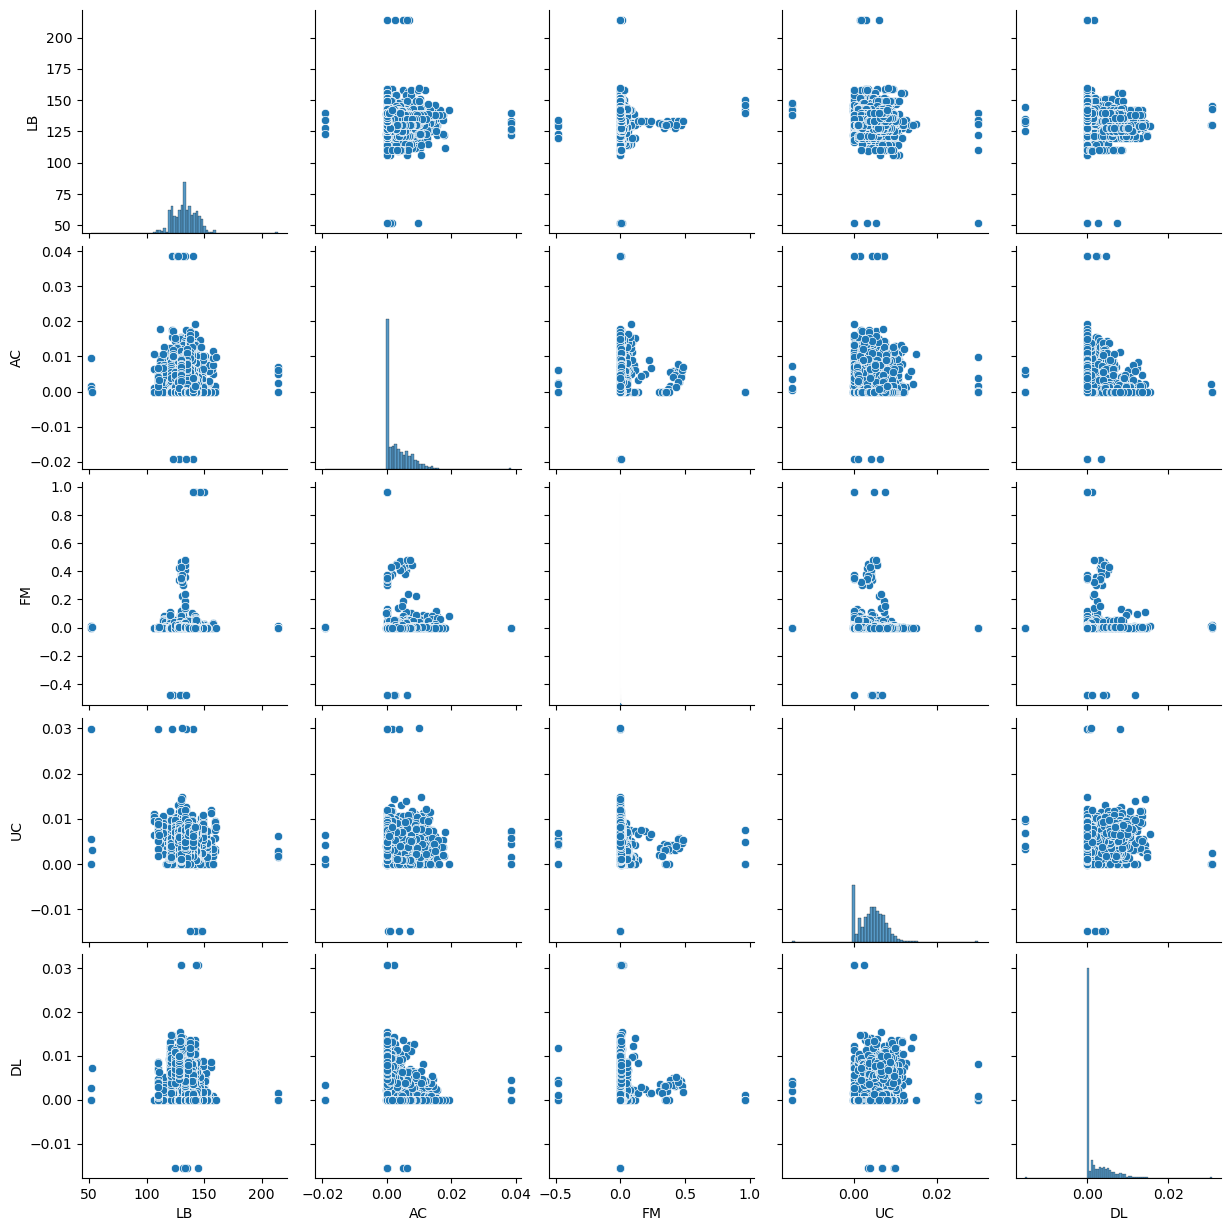

In [45]:
#pairplot the certain features
sns.pairplot(data[['LB', 'AC', 'FM', 'UC','DL']])
plt.show()

In [ ]:
#pairplot used to understand the relation between variables through cluster